# EDA on Data Science Job Salaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.shape

(607, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


## 1. Data cleaning

In [5]:
# Drop columns that is not useful

df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
# Check for missing values

df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.describe().astype(int).transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,607,2021,0,2020,2021,2022,2022,2022
salary,607,324000,1544357,4000,70000,115000,165000,30400000
salary_in_usd,607,112297,70957,2859,62726,101570,150000,600000
remote_ratio,607,70,40,0,50,100,100,100


In [8]:
df.describe(include='object').transpose()

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [9]:
categorical = ['experience_level','employment_type','job_title','employee_residence','company_location','company_size']

for i in categorical:
    print('Unique values in ' + i + ' : ' + str(df[i].unique()))
    print('\n')

print ('\nNumber of unique values in Categorical variables:\n')
print (df[categorical].nunique())

Unique values in experience_level : ['MI' 'SE' 'EN' 'EX']


Unique values in employment_type : ['FT' 'CT' 'PT' 'FL']


Unique values in job_title : ['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Dev

## 2. Data Visualization

<Axes: >

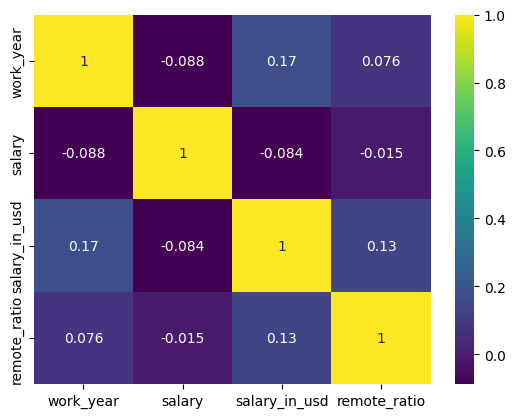

In [10]:
int_df = df.select_dtypes(include='int')
corr_matrix = int_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis')

### 2.1 Job Titles

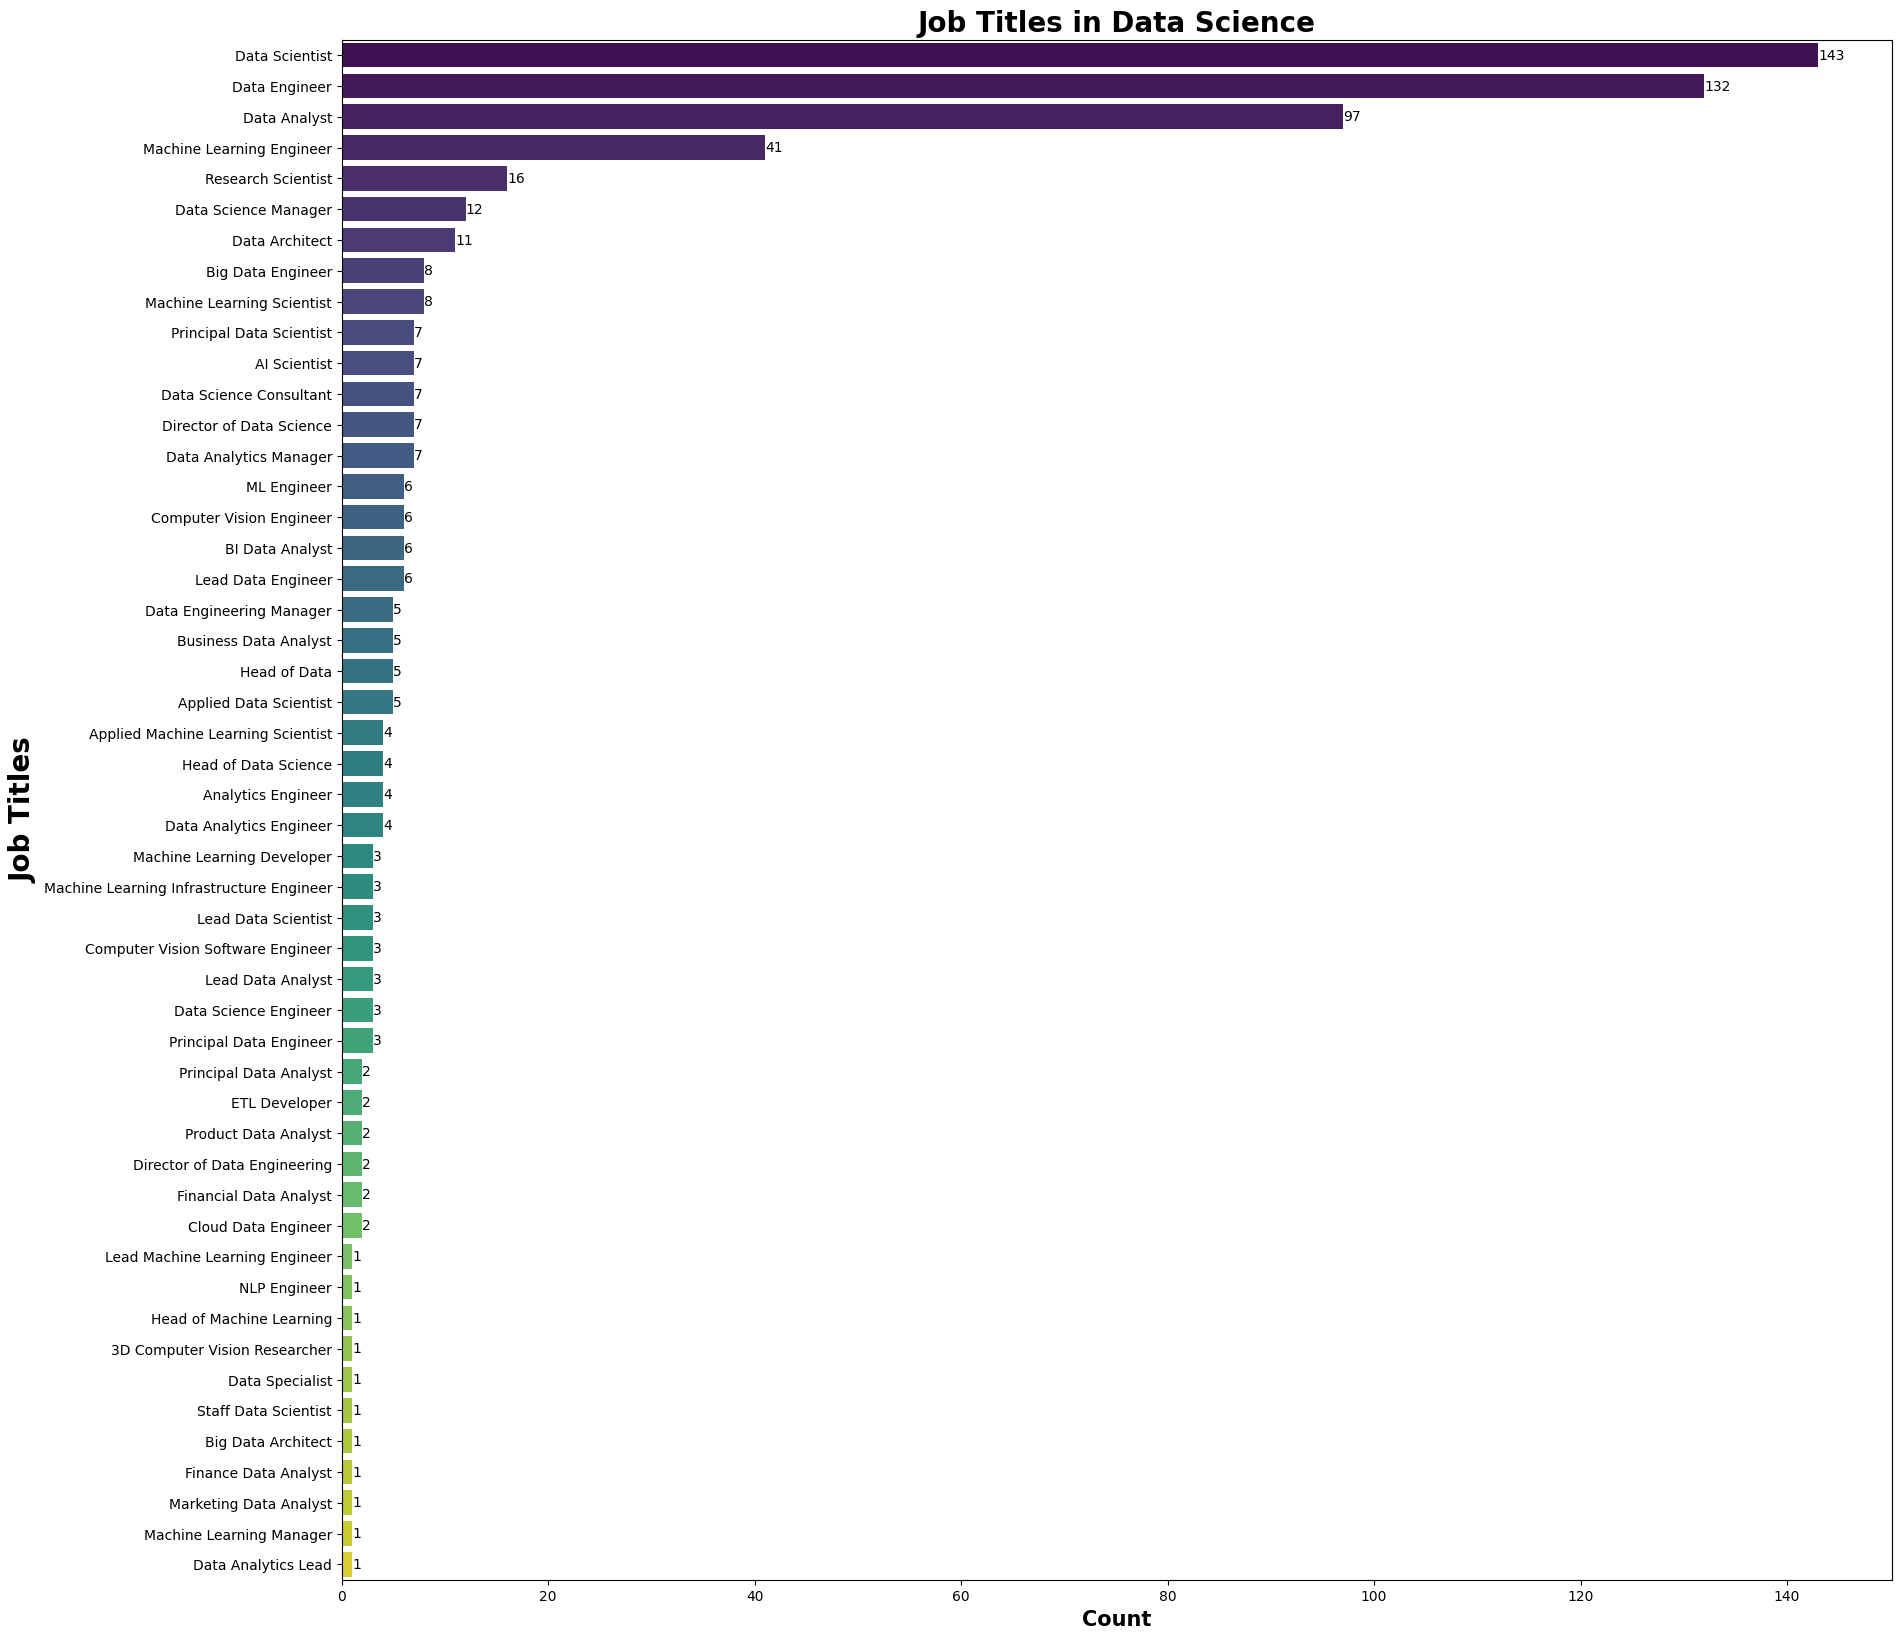

In [11]:
plt.figure(figsize=(20, 20))
plt.title('Job Titles in Data Science', fontsize=20, fontweight='bold')

# Create the count plot with job titles ordered by their counts
ax = sns.countplot(y='job_title', data=df, order=df['job_title'].value_counts().index, palette='viridis')

# Set the x and y axis labels with font size and weight
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')

# Add labels to the bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()

### 2.2 Experience Level of Jobs

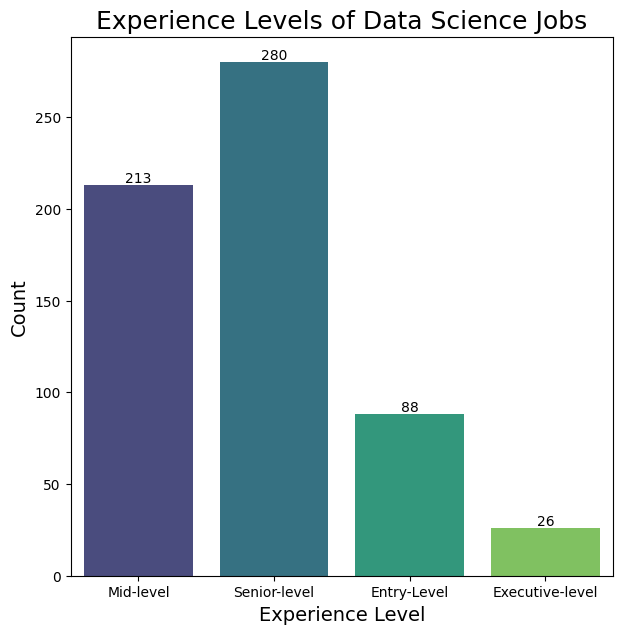

In [12]:
# Rename the job positions
df.experience_level.replace({'EN':'Entry-Level','MI':'Mid-level','SE':'Senior-level','EX':'Executive-level'}, inplace=True)
plt.figure(figsize=(7,7))
plt.title('Experience Levels of Data Science Jobs', fontsize=18)
ax = sns.countplot(x='experience_level', data=df, palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### 2.3 Employment Types

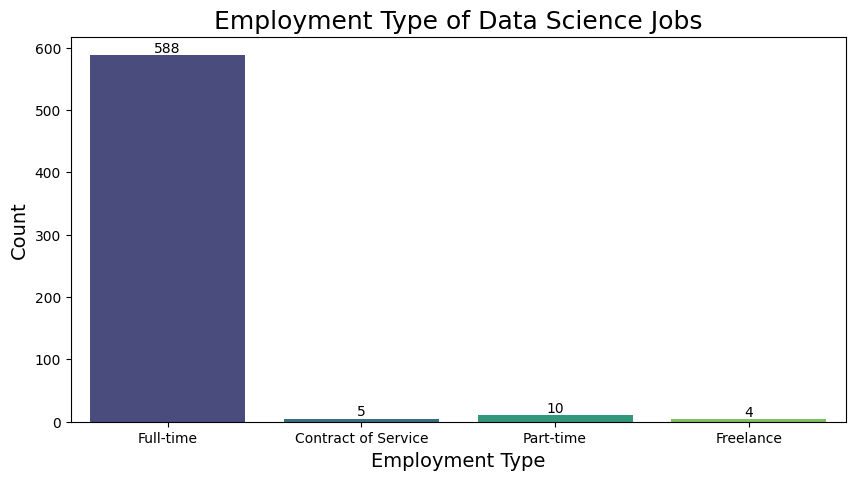

In [13]:
# Rename Employment types
df.employment_type.replace({'PT':'Part-time','FT':'Full-time','CT':'Contract of Service','FL':'Freelance'}, inplace=True)
plt.figure(figsize=(10, 5))
plt.title('Employment Type of Data Science Jobs', fontsize=18)
ax = sns.countplot(x='employment_type', data=df, palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### 2.4 Salaries (in USD)

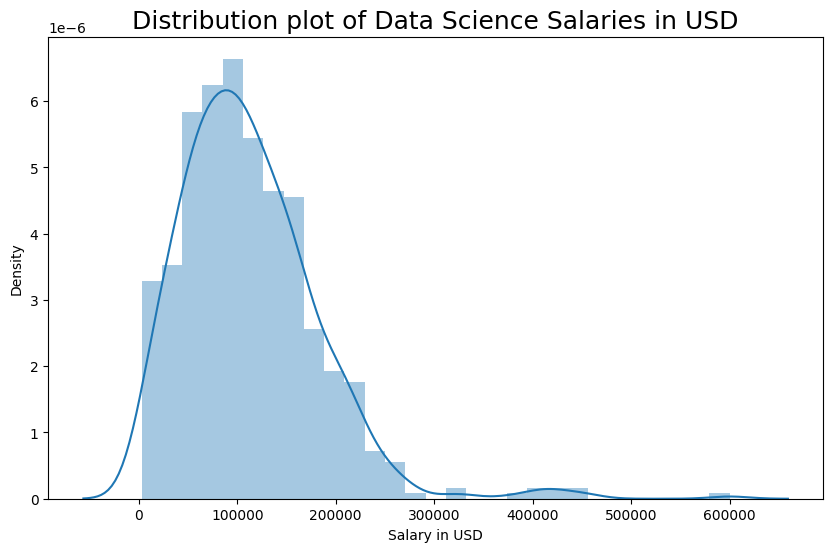

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df['salary_in_usd'])
plt.title('Distribution plot of Data Science Salaries in USD', fontsize=18)
plt.xlabel('Salary in USD')
plt.show()

### 2.5 Remote Ration of Employees

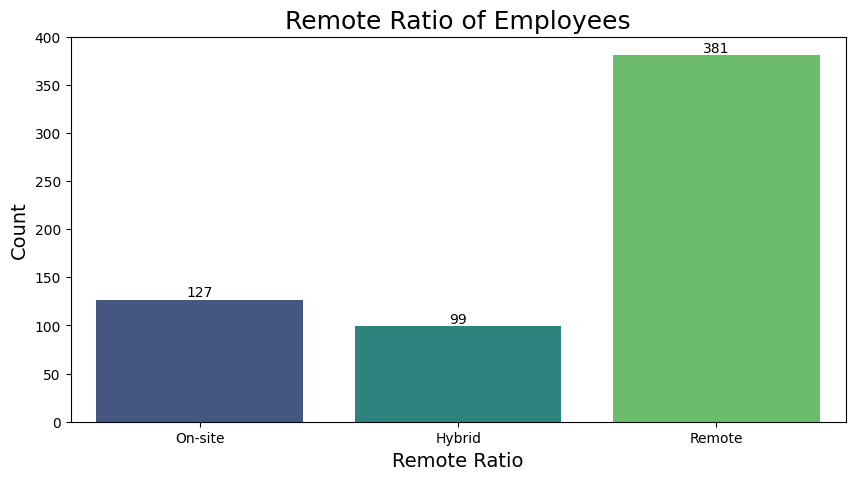

In [15]:
df.remote_ratio.replace({0:'On-site',50:'Hybrid',100:'Remote'}, inplace=True)
plt.figure(figsize=(10, 5))
plt.title('Remote Ratio of Employees', fontsize=18)
ax = sns.countplot(x='remote_ratio', data=df, palette='viridis')
ax.bar_label(ax.containers[0])
plt.xlabel('Remote Ratio', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## 3. Salary Analysis

### 3.1 Salary vs Work Year

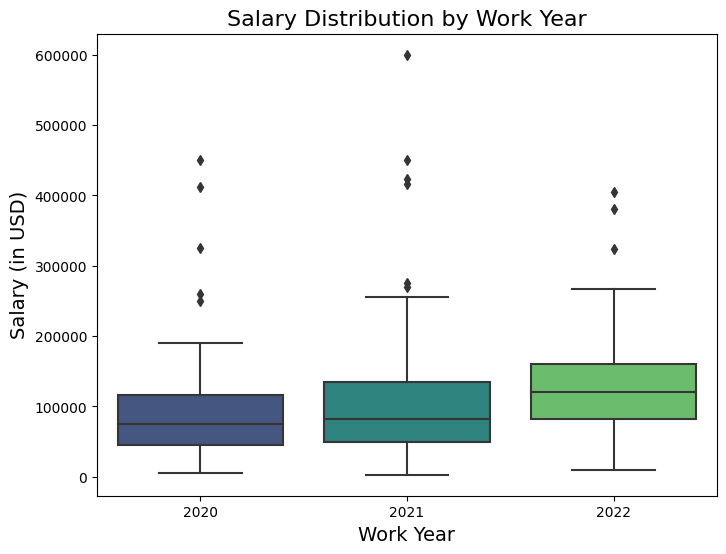

In [16]:
fig, axes = plt.subplots(figsize=(8, 6))
sns.boxplot(ax=axes, x='work_year', y='salary_in_usd', data=df, palette='viridis')
axes.set_title('Salary Distribution by Work Year', fontsize=16)
axes.set_xlabel('Work Year', fontsize=14)
axes.set_ylabel('Salary (in USD)', fontsize=14)
plt.show()

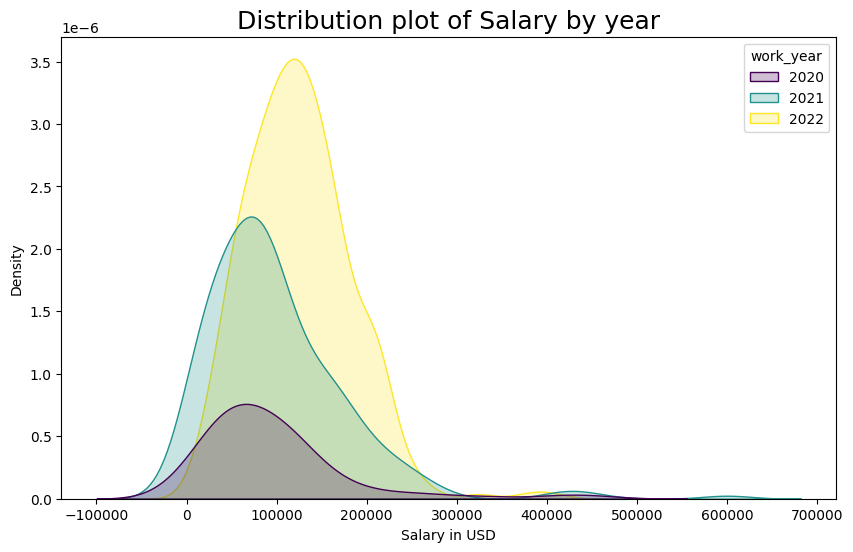

In [17]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='salary_in_usd', hue='work_year', fill=True, data=df, palette='viridis')
plt.title('Distribution plot of Salary by year', fontsize=18)
plt.xlabel('Salary in USD')
plt.show()

### 3.2 Salary by Experience Level

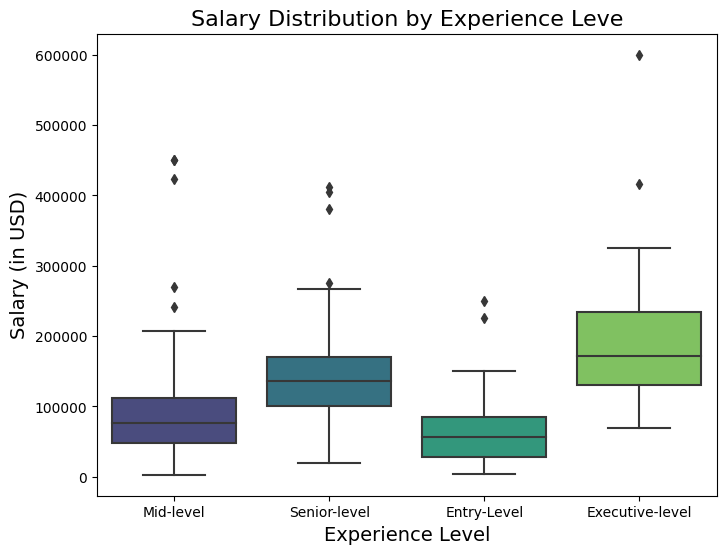

In [18]:
fig, axes = plt.subplots(figsize=(8, 6))
sns.boxplot(ax=axes, x='experience_level', y='salary_in_usd', data=df, palette='viridis')
axes.set_title('Salary Distribution by Experience Leve', fontsize=16)
axes.set_xlabel('Experience Level', fontsize=14)
axes.set_ylabel('Salary (in USD)', fontsize=14)
plt.show()

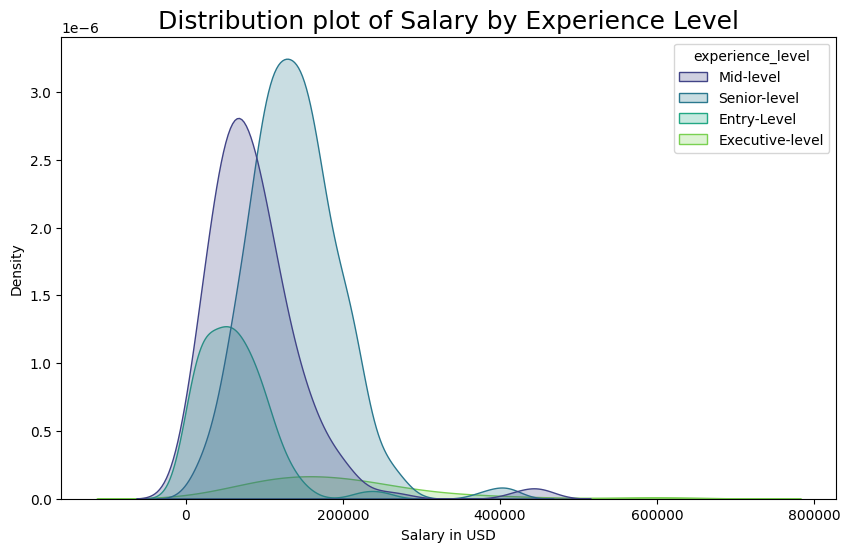

In [19]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='salary_in_usd', hue='experience_level', fill=True, data=df, palette='viridis')
plt.title('Distribution plot of Salary by Experience Level', fontsize=18)
plt.xlabel('Salary in USD')
plt.show()

### 3.3 Top 10 Job Salaries with Highest Salary

In [20]:
job_title_sal = pd.pivot_table(data=df,index=['job_title'],values=['salary_in_usd'], aggfunc='max').sort_values(by=['salary_in_usd'],ascending=False)
display(job_title_sal)

,salary_in_usd
job_title,
Principal Data Engineer,600000
Financial Data Analyst,450000
Research Scientist,450000
Applied Machine Learning Scientist,423000
Principal Data Scientist,416000
Data Scientist,412000
Data Analytics Lead,405000
Applied Data Scientist,380000
Director of Data Science,325000


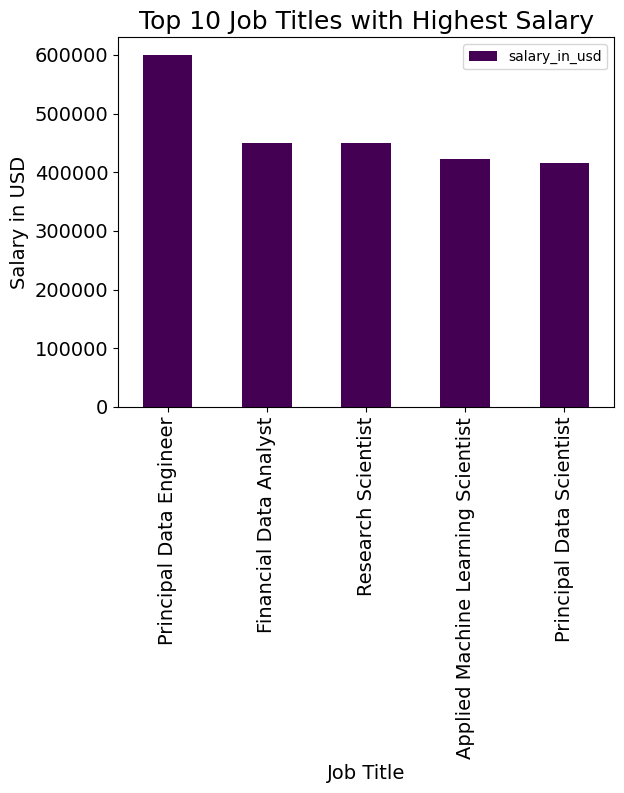

In [23]:
job_title_sal.head(5).plot.bar(cmap='viridis')
plt.title('Top 10 Job Titles with Highest Salary', fontsize=18)
plt.xlabel("Job Title", fontsize=14)
plt.ylabel("Salary in USD", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()